In [144]:
import pandas as pd
import numpy as np
from nltk import FreqDist

In [145]:
import matplotlib.pyplot as plt
import re
import os
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import gensim
from gensim.models import Word2Vec

In [146]:
# read US Equities News file
df = pd.read_csv("us_equities_news_dataset.csv")
df.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [148]:
df.shape

(221513, 9)

In [149]:
#read Stock Market Trends file
trend = pd.read_csv("Market Trends.csv")
trend.head()

,Date,Nasdaq Change %,Nasdaq Trend,S&P500 Change %,S&P500 Trend,DJI Change %,DJI Trend,VIX Change %,VIX Trend
0,1/2/2008,0.14,1,-1.44,0,-1.67,0,2.98,1
1,1/3/2008,0.15,1,0.00,0,0.10,1,-2.93,0
2,1/4/2008,-0.38,0,-2.46,0,-1.96,0,6.45,1
3,1/7/2008,0.74,1,0.32,1,0.21,1,-0.63,0
4,1/8/2008,0.26,1,-1.84,0,-1.86,0,6.89,1


In [150]:
#check total counts of missing values of each attribute
df.isna().sum()

id              0
ticker          0
title           0
category        0
content         8
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [151]:
#check total counts of missing values of each attribute
trend.isna().sum()

Date               0
Nasdaq Change %    0
Nasdaq Trend       0
S&P500 Change %    0
S&P500 Trend       0
DJI Change %       0
DJI Trend          0
VIX Change %       0
VIX Trend          0
dtype: int64

In [152]:
df.shape
trend.shape

(3274, 9)

# TEXT PREPROCESSING

In [153]:
#we analyse the following varialbes first: ticker, title, category, content, release_date, provider
df1 = df[['ticker','title', 'category', 'content', 'release_date', 'provider']]

df1.head()

,ticker,title,category,content,release_date,provider
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha


In [154]:
trend1 = trend.copy()
trend1.head()

,Date,Nasdaq Change %,Nasdaq Trend,S&P500 Change %,S&P500 Trend,DJI Change %,DJI Trend,VIX Change %,VIX Trend
0,1/2/2008,0.14,1,-1.44,0,-1.67,0,2.98,1
1,1/3/2008,0.15,1,0.00,0,0.10,1,-2.93,0
2,1/4/2008,-0.38,0,-2.46,0,-1.96,0,6.45,1
3,1/7/2008,0.74,1,0.32,1,0.21,1,-0.63,0
4,1/8/2008,0.26,1,-1.84,0,-1.86,0,6.89,1


In [155]:
df1.dtypes

ticker          object
title           object
category        object
content         object
release_date    object
provider        object
dtype: object

In [156]:
#convert column [ release_date] into date
df2 = df1.copy()
df2['release_date'] = df2['release_date'].astype('datetime64[ns]')

In [157]:
df2['ticker'] = df2['ticker'].astype(str)
df2['title'] = df2['title'].fillna('0').astype(str)
df2['category'] = df2['category'].astype(str)
df2['content'] = df2['content'].fillna('0').astype(str)
df2['provider'] = df2['provider'].astype(str)


In [158]:
df2.head()

,ticker,title,category,content,release_date,provider
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha


In [159]:
trend1.dtypes

Date                object
Nasdaq Change %    float64
Nasdaq Trend         int64
S&P500 Change %    float64
S&P500 Trend         int64
DJI Change %       float64
DJI Trend            int64
VIX Change %       float64
VIX Trend            int64
dtype: object

In [160]:
file = df2.copy()

### Find Frequency Distributions with NLTK

In [161]:
# remove non alphabets
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)

# tokenn alphabets-only list
tokenize = lambda x: word_tokenize(x)

# assign ps to a lambda function to run on each line of value
ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]

# assign lemmatizer to a lambda function to run on each line of value
lemmatizer = WordNetLemmatizer()
leammtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]

In [162]:
# apply all above methods to the column ''
print('Processing : [=', end='')
file['title'] = file['title'].apply(remove_non_alphabets)
print('=', end='')
file['title'] = file['title'].apply(tokenize)
print('=', end='')
file['title'] = file['title'].apply(stem)
print('=', end='')
file['title'] = file['title'].apply(leammtizer)
print('=', end='')
file['title'] = file['title'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')
file.head()

Processing : [=====] : Completed

,ticker,title,category,content,release_date,provider
0,NIO,whi share of chine electr car maker nio are fl...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool
1,NIO,nio onli consum gainer workhors group among loser,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha
2,NIO,nio lead consum gainer beyond meat and mattel ...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha
3,NIO,nio nvax among premarket gainer,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha
4,NIO,plug nio among premarket gainer,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha


In [163]:
# apply all above methods to the column ''
print('Processing : [=', end='')
file['content'] = file['content'].apply(remove_non_alphabets)
print('=', end='')
file['content'] = file['content'].apply(tokenize)
print('=', end='')
file['content'] = file['content'].apply(stem)
print('=', end='')
file['contente'] = file['content'].apply(leammtizer)
print('=', end='')
file['content'] = file['content'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')
file.head()

Processing : [=====] : Completed

,ticker,title,category,content,release_date,provider,contente
0,NIO,whi share of chine electr car maker nio are fl...,news,what s happen share of chines electr car maker...,2020-01-15,The Motley Fool,"[what, s, happen, share, of, chine, electr, ca..."
1,NIO,nio onli consum gainer workhors group among loser,news,gainer nio nyse nio loser mgp ingredi nasdaq m...,2020-01-18,Seeking Alpha,"[gainer, nio, nyse, nio, loser, mgp, ingredi, ..."
2,NIO,nio lead consum gainer beyond meat and mattel ...,news,gainer nio nyse nio villag farm intern nasdaq ...,2020-01-15,Seeking Alpha,"[gainer, nio, nyse, nio, villag, farm, intern,..."
3,NIO,nio nvax among premarket gainer,news,cemtrex nasdaq cetx after fy result fluent nas...,2020-01-15,Seeking Alpha,"[cemtrex, nasdaq, cetx, after, fy, result, flu..."
4,NIO,plug nio among premarket gainer,news,atyr pharma nasdaq life on kyorin pharma deal ...,2020-01-06,Seeking Alpha,"[atyr, pharma, nasdaq, life, on, kyorin, pharm..."


In [164]:
title = file['title'].str.lower()

In [165]:
content = file['content'].str.lower()

In [166]:
import nltk
from nltk import FreqDist

In [167]:
title_tokens = nltk.word_tokenize(title.to_string())

In [168]:
content_tokens = nltk.word_tokenize(content.to_string())

In [169]:
#change all tokens into lower case 
title_words1 = [w.lower() for w in title_tokens]   #list comprehension 
content_words1 = [w.lower() for w in content_tokens]   #list comprehension 

#only keep text words, no numbers 
title_words2 = [w for w in title_words1 if w.isalpha()]
content_words2 = [w for w in content_words1 if w.isalpha()]

In [170]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Cexuan
[nltk_data]     Song\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
#only keep the words that not in nltk stopwords word list
titlewords_nostopwords = [w for w in title_words2 if w not in stopwords.words('english')]
contentwords_nostopwords = [w for w in content_words2 if w not in stopwords.words('english')]

In [172]:
#generate a frequency dictionary for all tokens 
titlefreq_nostw = FreqDist(titlewords_nostopwords)

#sort the frequency list in decending order
sorted_titlefreq_nostw = sorted(titlefreq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_titlefreq_nostw

[('stock', 37308),
 ('earn', 33068),
 ('q', 26575),
 ('u', 20067),
 ('beat', 10834),
 ('market', 10699),
 ('trade', 10047),
 ('revenu', 9180),
 ('estim', 8983),
 ('new', 8514),
 ('top', 8398),
 ('buy', 7613),
 ('report', 7407),
 ('whi', 6788),
 ('higher', 6097),
 ('close', 5640),
 ('sale', 5224),
 ('rise', 5036),
 ('appl', 4791),
 ('china', 4756),
 ('oil', 4622),
 ('share', 4593),
 ('highlight', 4538),
 ('week', 4522),
 ('bank', 4504),
 ('fall', 4475),
 ('zack', 4441),
 ('dow', 4410),
 ('lower', 4356),
 ('high', 4305),
 ('gain', 4272),
 ('ahead', 4176),
 ('growth', 4102),
 ('p', 4064),
 ('miss', 3912),
 ('data', 3856),
 ('investor', 3833),
 ('wall', 3831),
 ('analyst', 3790),
 ('say', 3713),
 ('deal', 3676),
 ('expect', 3607),
 ('amazon', 3398),
 ('watch', 3329),
 ('thi', 3327),
 ('futur', 3254),
 ('price', 3175),
 ('move', 3167),
 ('etf', 3119),
 ('hit', 3100),
 ('global', 2975),
 ('strong', 2819),
 ('invest', 2795),
 ('blog', 2779),
 ('fed', 2739),
 ('trump', 2733),
 ('sinc', 2729),


In [173]:
#generate a frequency dictionary for all tokens 
contentfreq_nostw = FreqDist(contentwords_nostopwords)

#sort the frequency list in decending order
contentsorted_titlefreq_nostw = sorted(contentfreq_nostw.items(),key = lambda k:k[1], reverse = True)
contentsorted_titlefreq_nostw

[('reuter', 42609),
 ('nyse', 39444),
 ('inc', 28183),
 ('nasdaq', 25815),
 ('com', 22559),
 ('invest', 21615),
 ('stock', 21310),
 ('u', 15721),
 ('report', 14859),
 ('ha', 14554),
 ('new', 9506),
 ('share', 8547),
 ('market', 8126),
 ('corpor', 7966),
 ('earn', 7898),
 ('compani', 7028),
 ('trade', 6994),
 ('york', 6186),
 ('investor', 5926),
 ('zack', 5721),
 ('n', 5640),
 ('announc', 5531),
 ('il', 5049),
 ('immedi', 5046),
 ('recent', 5029),
 ('higher', 5019),
 ('last', 4989),
 ('washington', 4804),
 ('wa', 4653),
 ('week', 4523),
 ('quarter', 4360),
 ('co', 4341),
 ('lower', 4272),
 ('releas', 4194),
 ('thi', 4117),
 ('corp', 4062),
 ('one', 3941),
 ('p', 3893),
 ('futur', 3761),
 ('c', 3671),
 ('london', 3668),
 ('year', 3647),
 ('q', 3614),
 ('bloomberg', 3613),
 ('group', 3606),
 ('oil', 3573),
 ('first', 3513),
 ('close', 3485),
 ('f', 3415),
 ('month', 3332),
 ('releasechicago', 3231),
 ('expect', 3032),
 ('price', 3027),
 ('wall', 3018),
 ('sinc', 2987),
 ('th', 2960),
 ('s

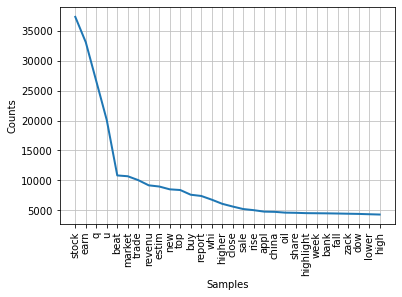

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [174]:
titlefreq_nostw.plot(30)

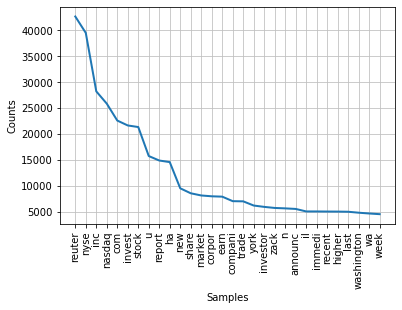

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [175]:
contentfreq_nostw.plot(30)

# POS approach

In [176]:
!pip install wordcloud

In [177]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Cexuan Song\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [178]:
#tag title tokens
POS_tagsT = nltk.pos_tag(title_tokens) #use unprocessed 'tokens', not 'words'

#Generate a list of POS tags start with 'N'
POS_tag_listT = [(word,tag) for (word,tag) in POS_tagsT if tag.startswith('N')]

In [179]:
#Generate a frequency distribution of all the POS tags
tag_freqT = nltk.FreqDist(POS_tag_listT)
#Sort the result 
sorted_tag_freqT = sorted(tag_freqT.items(), key = lambda k:k[1], reverse = True)

In [180]:
#Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS), show top 30 keywords (concepts) 
sorted_tag_freqT[0:30]

[(('stock', 'NN'), 37308),
 (('s', 'NN'), 32668),
 (('q', 'NN'), 21827),
 (('market', 'NN'), 10699),
 (('trade', 'NN'), 9775),
 (('beat', 'NN'), 8456),
 (('revenu', 'NN'), 8267),
 (('earn', 'NN'), 8156),
 (('estim', 'NN'), 6099),
 (('report', 'NN'), 5813),
 (('sale', 'NN'), 5224),
 (('whi', 'NN'), 5061),
 (('oil', 'NN'), 4622),
 (('share', 'NN'), 4593),
 (('week', 'NN'), 4522),
 (('bank', 'NN'), 4504),
 (('zack', 'NN'), 4436),
 (('rise', 'NN'), 4175),
 (('growth', 'NN'), 4102),
 (('close', 'NN'), 4085),
 (('fall', 'NN'), 3869),
 (('investor', 'NN'), 3833),
 (('dow', 'NN'), 3825),
 (('analyst', 'NN'), 3790),
 (('data', 'NNS'), 3699),
 (('china', 'NN'), 3647),
 (('p', 'NN'), 3556),
 (('deal', 'NN'), 3551),
 (('gain', 'NN'), 3310),
 (('price', 'NN'), 3175)]

In [181]:
#tag content tokens
POS_tagsC = nltk.pos_tag(content_tokens) #use unprocessed 'tokens', not 'words'

#Generate a list of POS tags start with 'N'
POS_tag_listC = [(wordC,tagC) for (wordC,tagC) in POS_tagsC if tagC.startswith('N')]

In [182]:
#Generate a list of POS tags start with 'N'
POS_tag_listC = [(wordC,tagC) for (wordC,tagC) in POS_tagsC if tagC.startswith('N')]

In [183]:
#Generate a frequency distribution of all the POS tags
tag_freqC = nltk.FreqDist(POS_tag_listC)
#Sort the result 
sorted_tag_freqC = sorted(tag_freqC.items(), key = lambda k:k[1], reverse = True)

In [184]:
#Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS), show top 30 keywords (concepts) 
sorted_tag_freqC[0:30]

[(('reuter', 'NN'), 39077),
 (('s', 'NN'), 24742),
 (('inc', 'NN'), 24147),
 (('com', 'NN'), 22377),
 (('stock', 'NN'), 21310),
 (('nyse', 'NN'), 14868),
 (('nasdaq', 'NN'), 11991),
 (('report', 'NN'), 11810),
 (('ha', 'NN'), 9975),
 (('share', 'NN'), 8547),
 (('market', 'NN'), 8126),
 (('corpor', 'NN'), 7402),
 (('t', 'NN'), 6789),
 (('compani', 'NN'), 6279),
 (('york', 'NN'), 6186),
 (('investor', 'NN'), 5926),
 (('trade', 'NN'), 5915),
 (('zack', 'NN'), 4977),
 (('week', 'NN'), 4523),
 (('washington', 'NN'), 4510),
 (('quarter', 'NN'), 4360),
 (('i', 'NN'), 4239),
 (('earn', 'NN'), 4143),
 (('o', 'NN'), 4017),
 (('announc', 'NN'), 3833),
 (('co', 'NN'), 3676),
 (('year', 'NN'), 3647),
 (('group', 'NN'), 3606),
 (('il', 'NN'), 3583),
 (('oil', 'NN'), 3573)]

# Word Cloud for Title

In [185]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [186]:
stopwords = set(STOPWORDS)

In [187]:
#comment_words = ''
#for val in title:
     
    # typecaste each val to string
#    val = str(val)
 
    # split the value
#    tokens = val.split()
     
    # Converts each token into lowercase
#    for i in range(len(tokens)):
#        tokens[i] = tokens[i].lower()
     
#    comment_words += " ".join(tokens)+" "
# 
#wordcloud = WordCloud(width = 800, height = 800,
#                background_color ='white',
#                stopwords = stopwords,
#                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
#plt.figure(figsize = (8, 10), facecolor = None)
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad = 0)
#plt.title('Word Cloud for Title')

# Word Cloud for Content

In [188]:
#comment_words2 = ''
#for val2 in content:
     
    # typecaste each val to string
#    val2 = str(val2)
 
    # split the value
#    tokens2 = val2.split()
     
    # Converts each token into lowercase
#    for i2 in range(len(tokens2)):
#        tokens2[i2] = tokens2[i2].lower()
     
#    comment_words2 += " ".join(tokens2)+" "
 
#wordcloud2 = WordCloud(width = 800, height = 800,
#                background_color ='white',
#                stopwords = stopwords,
#                min_font_size = 10).generate(comment_words2)

# plot the WordCloud image                      
#plt.figure(figsize = (8, 10), facecolor = None)
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad = 0)
#plt.title('Word Cloud for Content')

In [189]:
df3 = df2.copy()

In [190]:
# append the positive and negative text reviews and Tags
df3['news'] = df3["title"] + df3["content"] 

In [191]:
df3.head()

,ticker,title,category,content,release_date,provider,news
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...


In [192]:
df3.drop(columns=['title', 'content'])

,ticker,category,release_date,provider,news
0,NIO,news,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...
1,NIO,news,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...
2,NIO,news,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...
3,NIO,news,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...
4,NIO,news,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...
...,...,...,...,...,...
221508,T,opinion,2012-10-04,Ivan Kitov,Crude And Steel Still In Sync We have been rep...
221509,T,opinion,2012-05-30,StreetAuthority,Forget AT T This Is The Telecom Stock You Sho...
221510,T,opinion,2012-07-16,Portfolio Cafe,Wall Street Exposed Part 3 How Dividends C...
221511,T,opinion,2012-09-02,Jeff Miller,Weighing The Week Ahead It s All About JobsFr...


In [193]:
news = df3['news'].str.lower()

### LM'S LEXICON

In [194]:
#define the function to read the sentiment dictionary

def read_local_dictionary(file):
    # create dictionary list
    words_dict = []
    with open(file, "r") as f: 
        for line in f:
            t = line.strip().lower()
            words_dict.append(t)
    return words_dict

In [195]:
def count_pos_neg(data, positive_dict, negative_dict):
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 
    poscnt = []
    negcnt = []
    netcnt = []

    for nrow in range(0,len(data)):
        text = data[nrow]
        
        qa = 0
        qb = 0
        
       # for word in text:
        #    if word in prositive_dict: 
         #       qa = qa + 1
          #  elif word in negative_dict:
           #     qb = qb + 1

        for word in positive_dict :
            if (word in text) :
                qa = qa + 1

        for word in negative_dict :
            if (word in text) :
                qb = qb + 1

        qc = qa - qb

        poscnt.append(qa)
        negcnt.append(qb)
        netcnt.append(qc)

    return (poscnt, negcnt, netcnt)

In [196]:
pos_list_LM = read_local_dictionary('positive-words-LM.txt')
neg_list_LM = read_local_dictionary('negative-words-LM.txt')

In [197]:
df3['poscnt_LM'], df3['negcnt_LM'], df3['netcnt_LM'] = count_pos_neg(news, pos_list_LM, neg_list_LM)

In [198]:
df3.head()

,ticker,title,category,content,release_date,provider,news,poscnt_LM,negcnt_LM,netcnt_LM
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...,2,16,-14
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...,1,1,0
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...,2,3,-1
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...,2,1,1
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...,9,6,3


###  TEXTBLOB

In [199]:
from textblob import TextBlob
import seaborn as sns

In [200]:
df3["score_TextBlob"] = df3["news"].map(lambda x:TextBlob(x).sentiment.polarity)

In [201]:
df3.head()

,ticker,title,category,content,release_date,provider,news,poscnt_LM,negcnt_LM,netcnt_LM,score_TextBlob
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...,2,16,-14,0.134791
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...,1,1,0,-0.100000
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...,2,3,-1,-0.015909
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...,2,1,1,0.112727
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...,9,6,3,0.044949


In [202]:
df4 = df3.copy()

In [203]:
df4['YEAR'] = pd.to_datetime(df4['release_date']).dt.year
df4['MONTH'] = pd.to_datetime(df4['release_date']).dt.month
df4['DAY'] = pd.to_datetime(df4['release_date']).dt.day


In [204]:
df4.head()

,ticker,title,category,content,release_date,provider,news,poscnt_LM,negcnt_LM,netcnt_LM,score_TextBlob,YEAR,MONTH,DAY
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...,2,16,-14,0.134791,2020,1,15
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...,1,1,0,-0.100000,2020,1,18
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...,2,3,-1,-0.015909,2020,1,15
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...,2,1,1,0.112727,2020,1,15
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...,9,6,3,0.044949,2020,1,6


In [205]:
#rename trend columns Date to be release_date, so that later we can do left join
trend1.rename(columns = {'Date':'release_date'}, inplace = True)

In [206]:
#convert column [ release_date] into date
trend2 = trend1.copy()
trend2['release_date'] = trend2['release_date'].astype('datetime64[ns]')

In [207]:
data = df4.merge(trend2, on='release_date', how='left')

In [208]:
data1 = data.copy()

In [209]:
data2=data1.drop(columns=['Nasdaq Change %', 'S&P500 Change %', 'DJI Change %', 'VIX Change %'])

In [210]:
data2 = data2.fillna(0)

In [211]:
data2.head()

,ticker,title,category,content,release_date,provider,news,poscnt_LM,negcnt_LM,netcnt_LM,score_TextBlob,YEAR,MONTH,DAY,Nasdaq Trend,S&P500 Trend,DJI Trend,VIX Trend
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...,2,16,-14,0.134791,2020,1,15,0.0,1.0,1.0,1.0
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...,1,1,0,-0.100000,2020,1,18,0.0,0.0,0.0,0.0
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...,2,3,-1,-0.015909,2020,1,15,0.0,1.0,1.0,1.0
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...,2,1,1,0.112727,2020,1,15,0.0,1.0,1.0,1.0
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...,9,6,3,0.044949,2020,1,6,0.0,1.0,1.0,0.0


In [212]:
#data2.to_csv('news_and_trend.csv')

<AxesSubplot:>

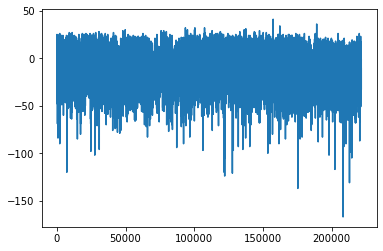

In [213]:
data2['netcnt_LM'].plot()

<AxesSubplot:>

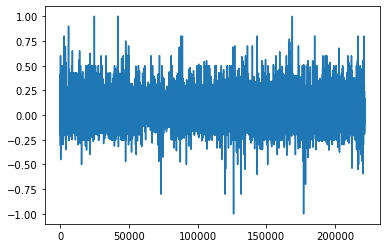

In [214]:
data2['score_TextBlob'].plot()

In [215]:
data3 = data2.copy()

In [216]:
#get the review score based on LM dictionary, if netcnt_LM > 0, the LM_score is 1, else, the LM_score is 0
data3.loc[data3['netcnt_LM'] > 0, 'LM_score'] = 1
data3.loc[data3['netcnt_LM'] <= 0, 'LM_score'] = 0

In [217]:
#get the review score based on LM dictionary, if netcnt_LM > 0, the LM_score is 1, else, the LM_score is 0
data3.loc[data3['score_TextBlob'] > 0, 'TB_score'] = 1
data3.loc[data3['score_TextBlob'] <= 0, 'TB_score'] = 0

In [218]:
data3.head()

,ticker,title,category,content,release_date,provider,news,poscnt_LM,negcnt_LM,netcnt_LM,score_TextBlob,YEAR,MONTH,DAY,Nasdaq Trend,S&P500 Trend,DJI Trend,VIX Trend,LM_score,TB_score
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,Why Shares of Chinese Electric Car Maker NIO A...,2,16,-14,0.134791,2020,1,15,0.0,1.0,1.0,1.0,0.0,1.0
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,NIO only consumer gainer Workhorse Group amon...,1,1,0,-0.100000,2020,1,18,0.0,0.0,0.0,0.0,0.0,0.0
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,NIO leads consumer gainers Beyond Meat and Ma...,2,3,-1,-0.015909,2020,1,15,0.0,1.0,1.0,1.0,0.0,0.0
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,NIO NVAX among premarket gainersCemtrex NASD...,2,1,1,0.112727,2020,1,15,0.0,1.0,1.0,1.0,1.0,1.0
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,PLUG NIO among premarket gainersaTyr Pharma ...,9,6,3,0.044949,2020,1,6,0.0,1.0,1.0,0.0,1.0,1.0


# Prediction Matrix for Nasdaq through LM and TB


In [219]:
#create confusion matrix for LM_score 
LM_matrix = metrics.confusion_matrix(data3['LM_score'], data3['Nasdaq Trend'])

In [220]:
#create confusion matrix for TB_score 
TB_matrix = metrics.confusion_matrix(data3['TB_score'], data3['Nasdaq Trend'])

In [221]:
#define the function for the calculation of precision, recall and F_measure
def validation(y_actual, y_predicted):
    precision = round(metrics.precision_score(y_actual, y_predicted), 3)
    recall = round(metrics.recall_score(y_actual, y_predicted), 3)
    F_measure = round(metrics.f1_score(y_actual, y_predicted, average='weighted'), 3)
    return precision, recall, F_measure

In [222]:
#get the precision, recall and F_measure of each approach
Nasdaq_LM_precision, Nasdaq_LM_recall, Nasdaq_LM_fmeasure = validation(data3['LM_score'], data3['Nasdaq Trend'])
Nasdaq_TB_precision, Nasdaq_TB_recall, Nasdaq_TB_fmeasure = validation(data3['TB_score'], data3['Nasdaq Trend'])

# Prediction Matrix for S&P 500 through LM and TB

In [223]:
#create confusion matrix for LM_score 
LM_matrix = metrics.confusion_matrix(data3['LM_score'], data3['S&P500 Trend'])

In [224]:
#create confusion matrix for TB_score 
TB_matrix = metrics.confusion_matrix(data3['TB_score'], data3['S&P500 Trend'])

In [225]:
#get the precision, recall and F_measure of each approach
SP500_LM_precision, SP500_LM_recall, SP500_LM_fmeasure = validation(data3['LM_score'], data3['S&P500 Trend'])
SP500_TB_precision, SP500_TB_recall, SP500_TB_fmeasure = validation(data3['TB_score'], data3['S&P500 Trend'])

In [226]:
SP500_TB_precision, SP500_TB_recall, SP500_TB_fmeasure

(0.855, 0.497, 0.57)

# Prediction Matrix for DJI through LM and TB

In [227]:
#create confusion matrix for LM_score 
LM_matrix = metrics.confusion_matrix(data3['LM_score'], data3['DJI Trend'])

In [228]:
#create confusion matrix for TB_score 
TB_matrix = metrics.confusion_matrix(data3['TB_score'], data3['DJI Trend'])

In [229]:
#get the precision, recall and F_measure of each approach
DJI_LM_precision, DJI_LM_recall, DJI_LM_fmeasure = validation(data3['LM_score'], data3['DJI Trend'])
DJI_TB_precision, DJI_TB_recall, DJI_TB_fmeasure = validation(data3['TB_score'], data3['DJI Trend'])

In [230]:
DJI_TB_precision, DJI_TB_recall, DJI_TB_fmeasure

(0.855, 0.5, 0.572)

# Prediction Matrix for VIX through LM and TB

In [231]:
#create confusion matrix for LM_score 
LM_matrix = metrics.confusion_matrix(data3['LM_score'], data3['VIX Trend'])

In [232]:
#create confusion matrix for TB_score 
TB_matrix = metrics.confusion_matrix(data3['TB_score'], data3['VIX Trend'])

In [233]:
#get the precision, recall and F_measure of each approach
VIX_LM_precision, VIX_LM_recall, VIX_LM_fmeasure = validation(data3['LM_score'], data3['VIX Trend'])
VIX_TB_precision, VIX_TB_recall, VIX_TB_fmeasure = validation(data3['TB_score'], data3['VIX Trend'])

In [234]:
# create a dictionary that stores all the precision information
precision_dict = {}
for m in ["Nasdaq","SP500","DJI", "VIX"]:
    precision_dict[m] = {}
    for f in ["LM","TB"]:
        exec('precision_dict["{}"]["{}"] = {}_{}_precision'.format(m, f, m, f))
        
#Precision Matrix
print("The Precision Matrix of LM Dict and TextBlob is: ")
pd.DataFrame(precision_dict).rename(columns={"Nasdaq":"Nasdaq Trend", 
                                             "SP500":"S&P500 Trend", 
                                             "DJI":"DJI Trend",
                                             "VIX":"VIX Trend"}, 
                                   index={"LM":"LM Dictionary", 
                                          "TB": "TextBlob"})

The Precision Matrix of LM Dict and TextBlob is: 


,Nasdaq Trend,S&P500 Trend,DJI Trend,VIX Trend
LM Dictionary,0.289,0.292,0.292,0.288
TextBlob,0.844,0.855,0.855,0.835


In [235]:
# create a dictionary that stores all the recall information
recall_dict = {}
for m in ["Nasdaq","SP500","DJI", "VIX"]:
    recall_dict[m] = {}
    for f in ["LM","TB"]:
        exec('recall_dict["{}"]["{}"] = {}_{}_recall'.format(m, f, m, f))
        
#Recall Matrix
print("The Recall Matrix of LM Dict and TextBlob is: ")
pd.DataFrame(recall_dict).rename(columns={"Nasdaq":"Nasdaq Trend", 
                                             "SP500":"S&P500 Trend", 
                                             "DJI":"DJI Trend",
                                             "VIX":"VIX Trend"}, 
                                   index={"LM":"LM Dictionary", 
                                          "TB": "TextBlob"})

The Recall Matrix of LM Dict and TextBlob is: 


,Nasdaq Trend,S&P500 Trend,DJI Trend,VIX Trend
LM Dictionary,0.499,0.493,0.495,0.414
TextBlob,0.502,0.497,0.500,0.413


In [236]:
# create a dictionary that stores all the fmeasure information
fmeasure_dict = {}
for m in ["Nasdaq","SP500","DJI", "VIX"]:
    fmeasure_dict[m] = {}
    for f in ["LM","TB"]:
        exec('fmeasure_dict["{}"]["{}"] = {}_{}_fmeasure'.format(m, f, m, f))
        
#fmeasure Matrix
print("The fmeasure Matrix of LM Dict and TextBlob is: ")
pd.DataFrame(fmeasure_dict).rename(columns={"Nasdaq":"Nasdaq Trend", 
                                             "SP500":"S&P500 Trend", 
                                             "DJI":"DJI Trend",
                                             "VIX":"VIX Trend"}, 
                                   index={"LM":"LM Dictionary", 
                                          "TB": "TextBlob"})

The fmeasure Matrix of LM Dict and TextBlob is: 


,Nasdaq Trend,S&P500 Trend,DJI Trend,VIX Trend
LM Dictionary,0.519,0.527,0.525,0.551
TextBlob,0.568,0.570,0.572,0.503


In [237]:
data3.isna().sum()

ticker            0
title             0
category          0
content           0
release_date      0
provider          0
news              0
poscnt_LM         0
negcnt_LM         0
netcnt_LM         0
score_TextBlob    0
YEAR              0
MONTH             0
DAY               0
Nasdaq Trend      0
S&P500 Trend      0
DJI Trend         0
VIX Trend         0
LM_score          0
TB_score          0
dtype: int64

# DATA MODELING

# Split Train-Test Sets for Nasdaq

In [238]:
# split to 30 percent test data and 70 percent train data
# labels can be seen as y, an dependent variable
Ntrain_corpus, Ntest_corpus, Ntrain_labels, Ntest_labels = train_test_split(data3["news"],
                                                                        data3["Nasdaq Trend"],
                                                                        test_size=0.3,
                                                                        random_state=42) #random state is a seed value

### Binary Bag of Words

In [239]:
# build binary features' vectorizer and get features
bi_vectorizer=CountVectorizer(min_df=1, ngram_range=(1,1), binary = True)
Nbi_train_features = bi_vectorizer.fit_transform(Ntrain_corpus)
Nbi_test_features = bi_vectorizer.transform(Ntest_corpus)

### TF-IDF

In [240]:
# build tfidf features' vectorizer and get features
tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
Ntfidf_train_features = tfidf_vectorizer.fit_transform(Ntrain_corpus)  
Ntfidf_test_features = tfidf_vectorizer.transform(Ntest_corpus)   

# Split Train-Test Sets for S&P 500

In [241]:
# split to 30 percent test data and 70 percent train data
# labels can be seen as y, an dependent variable
Strain_corpus, Stest_corpus, Strain_labels, Stest_labels = train_test_split(data3["news"],
                                                                        data3["S&P500 Trend"],
                                                                        test_size=0.3,
                                                                        random_state=42) #random state is a seed value

In [242]:
Sbi_train_features = bi_vectorizer.fit_transform(Strain_corpus)
Sbi_test_features = bi_vectorizer.transform(Stest_corpus)

In [243]:
Stfidf_train_features = tfidf_vectorizer.fit_transform(Strain_corpus)  
Stfidf_test_features = tfidf_vectorizer.transform(Stest_corpus)  

# Split Train-Test Sets for DJI

In [244]:
# split to 30 percent test data and 70 percent train data
# labels can be seen as y, an dependent variable
Dtrain_corpus, Dtest_corpus, Dtrain_labels, Dtest_labels = train_test_split(data3["news"],
                                                                        data3["DJI Trend"],
                                                                        test_size=0.3,
                                                                        random_state=42) #random state is a seed value

In [245]:
Dbi_train_features = bi_vectorizer.fit_transform(Dtrain_corpus)
Dbi_test_features = bi_vectorizer.transform(Dtest_corpus)

In [246]:
Dtfidf_train_features = tfidf_vectorizer.fit_transform(Dtrain_corpus)  
Dtfidf_test_features = tfidf_vectorizer.transform(Dtest_corpus)  

# Split Train-Test Sets for VIX

In [247]:
# split to 30 percent test data and 70 percent train data
# labels can be seen as y, an dependent variable
Vtrain_corpus, Vtest_corpus, Vtrain_labels, Vtest_labels = train_test_split(data3["news"],
                                                                        data3["VIX Trend"],
                                                                        test_size=0.3,
                                                                        random_state=42) #random state is a seed value

In [248]:
Vbi_train_features = bi_vectorizer.fit_transform(Vtrain_corpus)
Vbi_test_features = bi_vectorizer.transform(Vtest_corpus)

In [249]:
Vtfidf_train_features = tfidf_vectorizer.fit_transform(Vtrain_corpus)  
Vtfidf_test_features = tfidf_vectorizer.transform(Vtest_corpus)  

# Define Evaluation Function

In [250]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [251]:
# define a function that trains the model, performs predictions and evaluates the predictions
def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    #plot confusion metrics
    plot = metrics.confusion_matrix(test_labels, predictions)
    # plotting the confusion matrix
    cmtx = pd.DataFrame(plot, index=['true:0', 'true:1'], columns=['pred:0', 'pred:1'])
    print('The Confusion Matrix is: ')
    print(cmtx)
    # evaluate model prediction performance   
    precision = round(metrics.precision_score(test_labels,predictions), 3)
    recall = round(metrics.recall_score(test_labels,predictions), 3)
    F_measure = round(metrics.f1_score(test_labels,predictions, average='weighted'), 3)
    

    print('Precision:', precision)
    print('Recall:', recall)
    print('fmeasure:', F_measure)
    
    return plot, precision, recall, F_measure

# Import Classifiers

In [252]:
#import classifiers
from sklearn.naive_bayes import MultinomialNB # import naive bayes
from sklearn.linear_model import LogisticRegression # import logistic regression
#from sklearn import svm # import super vector machines
from sklearn.ensemble import RandomForestClassifier # import random forest

# Train and Test on Binary features on Nasdaq Trend

In [253]:
# assign naive bayes function to an object
mnb = MultinomialNB()

# predict and evaluate naive bayes
Nmnb_bi_plot, Nmnb_bi_precision, Nmnb_bi_recall, Nmnb_bi_fmeasure  = train_predict_evaluate_model(classifier=mnb,
                                           train_features=Nbi_train_features,
                                           train_labels=Ntrain_labels,
                                           test_features=Nbi_test_features,
                                           test_labels=Ntest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   15172   17980
true:1   12097   21205
Precision: 0.541
Recall: 0.637
fmeasure: 0.544


In [254]:
#assign logisitc regression to an object
log = LogisticRegression(solver='lbfgs', max_iter=100)

# predict and evaluate logistic regression
Nlog_bi_plot, Nlog_bi_precision, Nlog_bi_recall, Nlog_bi_fmeasure  = train_predict_evaluate_model(classifier=log,
                                           train_features=Nbi_train_features,
                                           train_labels=Ntrain_labels,
                                           test_features=Nbi_test_features,
                                           test_labels=Ntest_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Confusion Matrix is: 
        pred:0  pred:1
true:0   17758   15394
true:1   14913   18389
Precision: 0.544
Recall: 0.552
fmeasure: 0.544


In [255]:
# assign random forest function to an object
rf = RandomForestClassifier(criterion="entropy")

# predict and evaluate random forest
Nrf_bi_plot, Nrf_bi_precision, Nrf_bi_recall, Nrf_bi_fmeasure = train_predict_evaluate_model(classifier=rf,
                                           train_features=Nbi_train_features,
                                           train_labels=Ntrain_labels,
                                           test_features=Nbi_test_features,
                                           test_labels=Ntest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   17799   15353
true:1   13944   19358
Precision: 0.558
Recall: 0.581
fmeasure: 0.559


# Train and Test on Binary features on S&P500 Trend

In [256]:
# assign naive bayes function to an object
mnb = MultinomialNB()

# predict and evaluate naive bayes
Smnb_bi_plot, Smnb_bi_precision, Smnb_bi_recall, Smnb_bi_fmeasure  = train_predict_evaluate_model(classifier=mnb,
                                           train_features=Sbi_train_features,
                                           train_labels=Strain_labels,
                                           test_features=Sbi_test_features,
                                           test_labels=Stest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   15897   17938
true:1   12555   20064
Precision: 0.528
Recall: 0.615
fmeasure: 0.539


In [257]:
log = LogisticRegression()

# predict and evaluate logistic regression
Slog_bi_plot, Slog_bi_precision, Slog_bi_recall, Slog_bi_fmeasure  = train_predict_evaluate_model(classifier=log,
                                           train_features=Sbi_train_features,
                                           train_labels=Strain_labels,
                                           test_features=Sbi_test_features,
                                           test_labels=Stest_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Confusion Matrix is: 
        pred:0  pred:1
true:0   18729   15106
true:1   14851   17768
Precision: 0.54
Recall: 0.545
fmeasure: 0.549


In [258]:
# assign random forest function to an object
rf = RandomForestClassifier(criterion="entropy")

# predict and evaluate random forest
Srf_bi_plot, Srf_bi_precision, Srf_bi_recall, Srf_bi_fmeasure = train_predict_evaluate_model(classifier=rf,
                                           train_features=Sbi_train_features,
                                           train_labels=Strain_labels,
                                           test_features=Sbi_test_features,
                                           test_labels=Stest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   21113   12722
true:1   15852   16767
Precision: 0.569
Recall: 0.514
fmeasure: 0.569


# Train and Test on Binary features on DJI Trend

In [259]:
# assign naive bayes function to an object
mnb = MultinomialNB()

# predict and evaluate naive bayes
Dmnb_bi_plot, Dmnb_bi_precision, Dmnb_bi_recall, Dmnb_bi_fmeasure  = train_predict_evaluate_model(classifier=mnb,
                                           train_features=Dbi_train_features,
                                           train_labels=Dtrain_labels,
                                           test_features=Dbi_test_features,
                                           test_labels=Dtest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   16016   17542
true:1   12473   20423
Precision: 0.538
Recall: 0.621
fmeasure: 0.546


In [260]:
log = LogisticRegression()

# predict and evaluate logistic regression
Dlog_bi_plot, Dlog_bi_precision, Dlog_bi_recall, Dlog_bi_fmeasure  = train_predict_evaluate_model(classifier=log,
                                           train_features=Dbi_train_features,
                                           train_labels=Dtrain_labels,
                                           test_features=Dbi_test_features,
                                           test_labels=Dtest_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Confusion Matrix is: 
        pred:0  pred:1
true:0   18412   15146
true:1   14455   18441
Precision: 0.549
Recall: 0.561
fmeasure: 0.555


In [261]:
# assign random forest function to an object
rf = RandomForestClassifier(criterion="entropy")

# predict and evaluate random forest
Drf_bi_plot, Drf_bi_precision, Drf_bi_recall, Drf_bi_fmeasure = train_predict_evaluate_model(classifier=rf,
                                           train_features=Dbi_train_features,
                                           train_labels=Dtrain_labels,
                                           test_features=Dbi_test_features,
                                           test_labels=Dtest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   20260   13298
true:1   15363   17533
Precision: 0.569
Recall: 0.533
fmeasure: 0.568


# Train and Test on Binary features on VIX Trend

In [262]:
# assign naive bayes function to an object
mnb = MultinomialNB()

# predict and evaluate naive bayes
Vmnb_bi_plot, Vmnb_bi_precision, Vmnb_bi_recall, Vmnb_bi_fmeasure  = train_predict_evaluate_model(classifier=mnb,
                                           train_features=Vbi_train_features,
                                           train_labels=Vtrain_labels,
                                           test_features=Vbi_test_features,
                                           test_labels=Vtest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   25721   12927
true:1   15806   12000
Precision: 0.481
Recall: 0.432
fmeasure: 0.564


In [263]:
log = LogisticRegression()

# predict and evaluate logistic regression
Vlog_bi_plot, Vlog_bi_precision, Vlog_bi_recall, Vlog_bi_fmeausre = train_predict_evaluate_model(classifier=log,
                                           train_features=Vbi_train_features,
                                           train_labels=Vtrain_labels,
                                           test_features=Vbi_test_features,
                                           test_labels=Vtest_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Confusion Matrix is: 
        pred:0  pred:1
true:0   26938   11710
true:1   17236   10570
Precision: 0.474
Recall: 0.38
fmeasure: 0.555


In [264]:
# assign random forest function to an object
rf = RandomForestClassifier(criterion="entropy")

# predict and evaluate random forest
Vrf_bi_plot, Vrf_bi_precision, Vrf_bi_recall, Vrf_bi_fmeasure = train_predict_evaluate_model(classifier=rf,
                                           train_features=Vbi_train_features,
                                           train_labels=Vtrain_labels,
                                           test_features=Vbi_test_features,
                                           test_labels=Vtest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   36358    2290
true:1   24132    3674
Precision: 0.616
Recall: 0.132
fmeasure: 0.518


# Train and Test on TFIDF features on Nasdaq Trend

In [265]:
# assign naive bayes function to an object
mnb = MultinomialNB()

# predict and evaluate naive bayes
Nmnb_tfidf_plot, Nmnb_tfidf_precision, Nmnb_tfidf_recall, Nmnb_tfidf_fmeasure = train_predict_evaluate_model(classifier=mnb,
                                           train_features=Ntfidf_train_features,
                                           train_labels=Ntrain_labels,
                                           test_features=Ntfidf_test_features,
                                           test_labels=Ntest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   16067   17085
true:1   12994   20308
Precision: 0.543
Recall: 0.61
fmeasure: 0.546


In [266]:
log = LogisticRegression()

# predict and evaluate random forest
Nlog_tfidf_plot, Nlog_tfidf_precision, Nlog_tfidf_recall , Nlog_tfidf_fmeasure= train_predict_evaluate_model(classifier=log,
                                           train_features=Ntfidf_train_features,
                                           train_labels=Ntrain_labels,
                                           test_features=Ntfidf_test_features,
                                           test_labels=Ntest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   17578   15574
true:1   14121   19181
Precision: 0.552
Recall: 0.576
fmeasure: 0.553


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
# predict and evaluate random forest
Nrf_tfidf_plot, Nrf_tfidf_precision, Nrf_tfidf_recall , Nrf_tfidf_fmeasure = train_predict_evaluate_model(classifier=rf,
                                           train_features=Ntfidf_train_features,
                                           train_labels=Ntrain_labels,
                                           test_features=Ntfidf_test_features,
                                           test_labels=Ntest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   17850   15302
true:1   14172   19130
Precision: 0.556
Recall: 0.574
fmeasure: 0.556


# Train and Test on TFIDF features on SP500 Trend

In [268]:
# assign naive bayes function to an object
mnb = MultinomialNB()

# predict and evaluate naive bayes
Smnb_tfidf_plot, Smnb_tfidf_precision, Smnb_tfidf_recall, Smnb_tfidf_fmeasure = train_predict_evaluate_model(classifier=mnb,
                                           train_features=Stfidf_train_features,
                                           train_labels=Strain_labels,
                                           test_features=Stfidf_test_features,
                                           test_labels=Stest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   25019    8816
true:1   21391   11228
Precision: 0.56
Recall: 0.344
fmeasure: 0.527


In [269]:
log = LogisticRegression()

# predict and evaluate random forest
Slog_tfidf_plot, Slog_tfidf_precision, Slog_tfidf_recall , Slog_tfidf_fmeasure= train_predict_evaluate_model(classifier=log,
                                           train_features=Stfidf_train_features,
                                           train_labels=Strain_labels,
                                           test_features=Stfidf_test_features,
                                           test_labels=Stest_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Confusion Matrix is: 
        pred:0  pred:1
true:0   19974   13861
true:1   15175   17444
Precision: 0.557
Recall: 0.535
fmeasure: 0.563


In [270]:
# predict and evaluate random forest
Srf_tfidf_plot, Srf_tfidf_precision, Srf_tfidf_recall , Srf_tfidf_fmeasure = train_predict_evaluate_model(classifier=rf,
                                           train_features=Stfidf_train_features,
                                           train_labels=Strain_labels,
                                           test_features=Stfidf_test_features,
                                           test_labels=Stest_labels)

The Confusion Matrix is: 
        pred:0  pred:1
true:0   21019   12816
true:1   15939   16680
Precision: 0.566
Recall: 0.511
fmeasure: 0.566
